## <font color = black> _Diabetes Prediction Using Machine Learning Algorithms_ </font>

The goal of this project is to apply various Machine Learning algorithms on the Pima Indians Diabetes Dataset to detect diabetes in a patient.</font> <br>
In here we applied - 1) Logistic Regression 2) Support Vector Machine 3) K- Nearest Neighbor 4) Random Forest  5) Naive Bayes Classifier and 6) Gradient Boost Classifier. <br>
We compare the accuracy of the models and conclude which model is best suited for detecting diabetes over the dataset.

#### <font color = black> _Step 1: Import the necessary libraries_ </font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### <font color = black> _Step 2: Load the dataset_ </font>

In [2]:
df = pd.read_csv('/Users/sriharshithaayyalasomayajula/Desktop/Projects/Diabetes_Prediction/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking for any null values  
df.isnull().values.any()

False

#### <font color = black> _Step 3: Visualize the data_ </font>

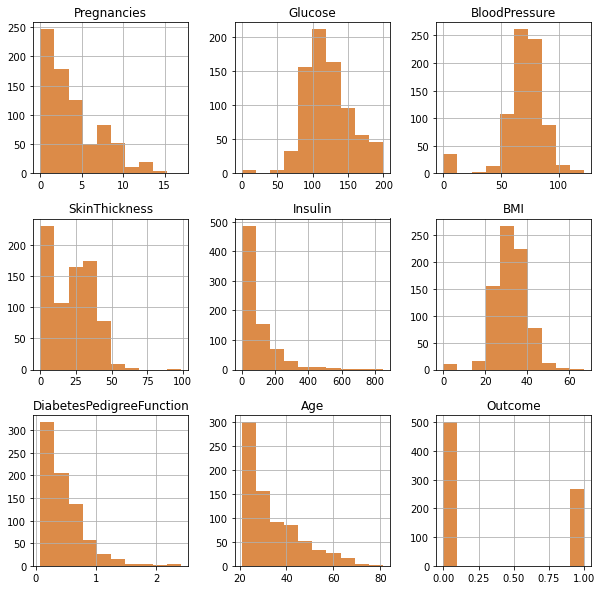

In [6]:
#histogram
df.hist(bins = 10,figsize = (10,10), color = '#dc8b48')
plt.show()

<AxesSubplot:>

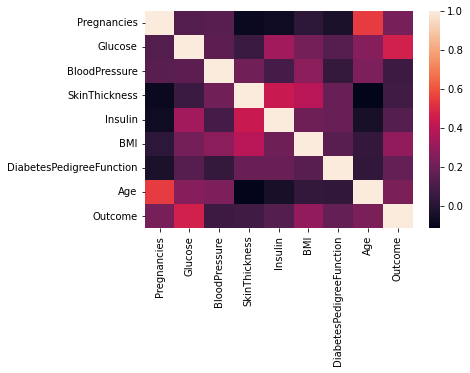

In [7]:
#correlation
sns.heatmap(df.corr())

In the above plot we can see that the skin thickness, insulin, pregnencies and age are completely independent of eachother. <br>
We can also observe that age and pregencies have negative correlation. <br>
We consider the total outcome in each target with 0 and 1
where,
- 0 means no diabetes
- 1 means diabetes

<AxesSubplot:xlabel='count', ylabel='Outcome'>

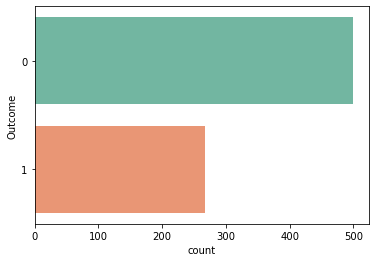

In [8]:
sns.countplot(y = df['Outcome'],palette = 'Set2')

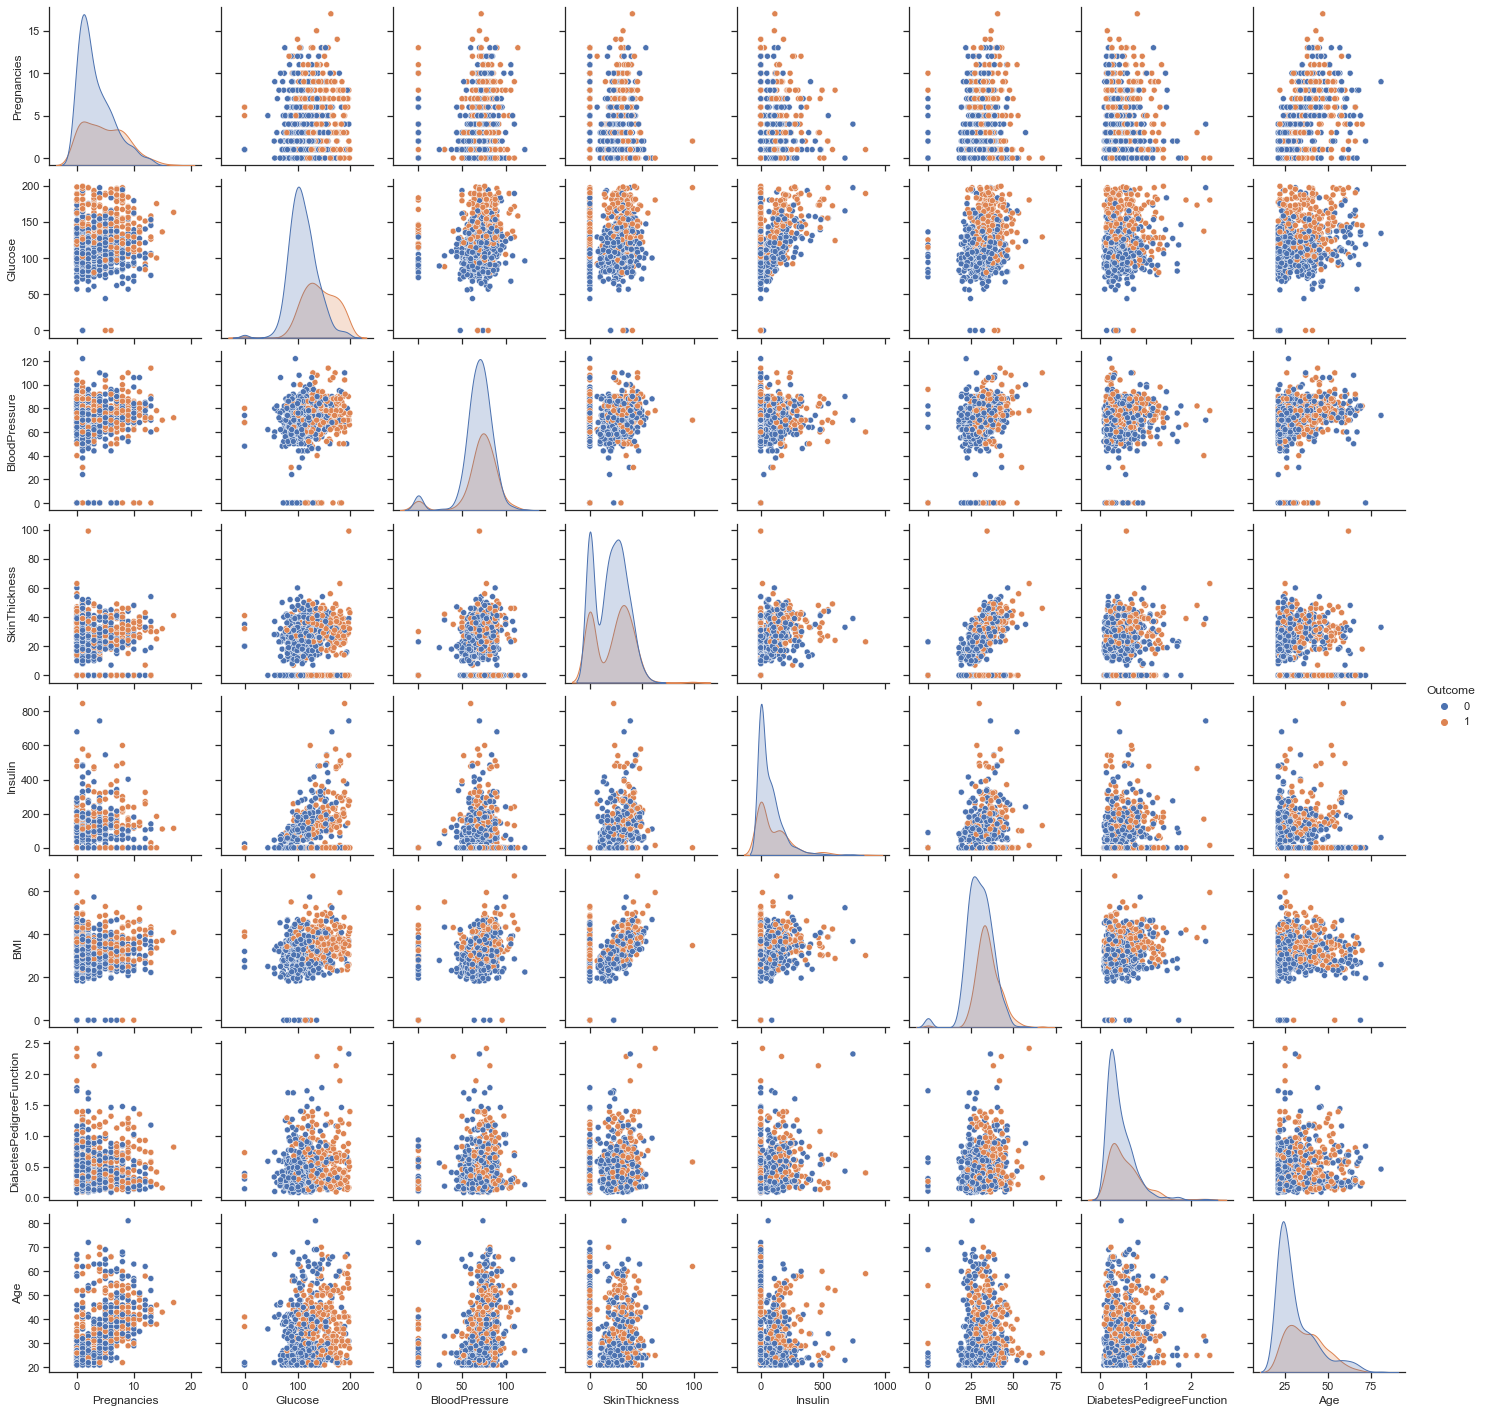

In [9]:
sns.set(style = "ticks")
sns.pairplot(df, hue = "Outcome")

Box plot for outlier visualization

<AxesSubplot:>

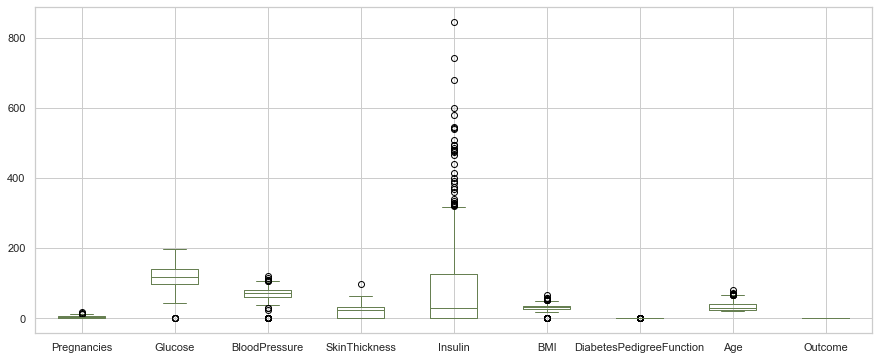

In [10]:
sns.set(style = "whitegrid")
df.boxplot(figsize = (15,6), color = '#678052')

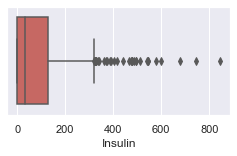

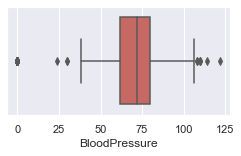

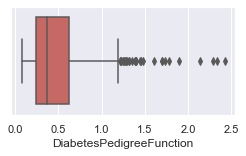

In [11]:
#box plot
sns.set(style = "whitegrid")
sns.set(rc = {'figure.figsize':(4,2)})

sns.boxplot(x = df['Insulin'],color = '#d75952')
plt.show()

sns.boxplot(x = df['BloodPressure'], color = '#d75952')
plt.show()

sns.boxplot(x = df['DiabetesPedigreeFunction'], color = '#d75952')
plt.show()

#### <font color = black> _Step 4: Remove the outliers_ </font>

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [13]:
#Remove the outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (639, 9))

We observe that more than 80 records are deleted.

#### <font color = black> _Step 5: Visualize the data after removing the outliers_ </font>

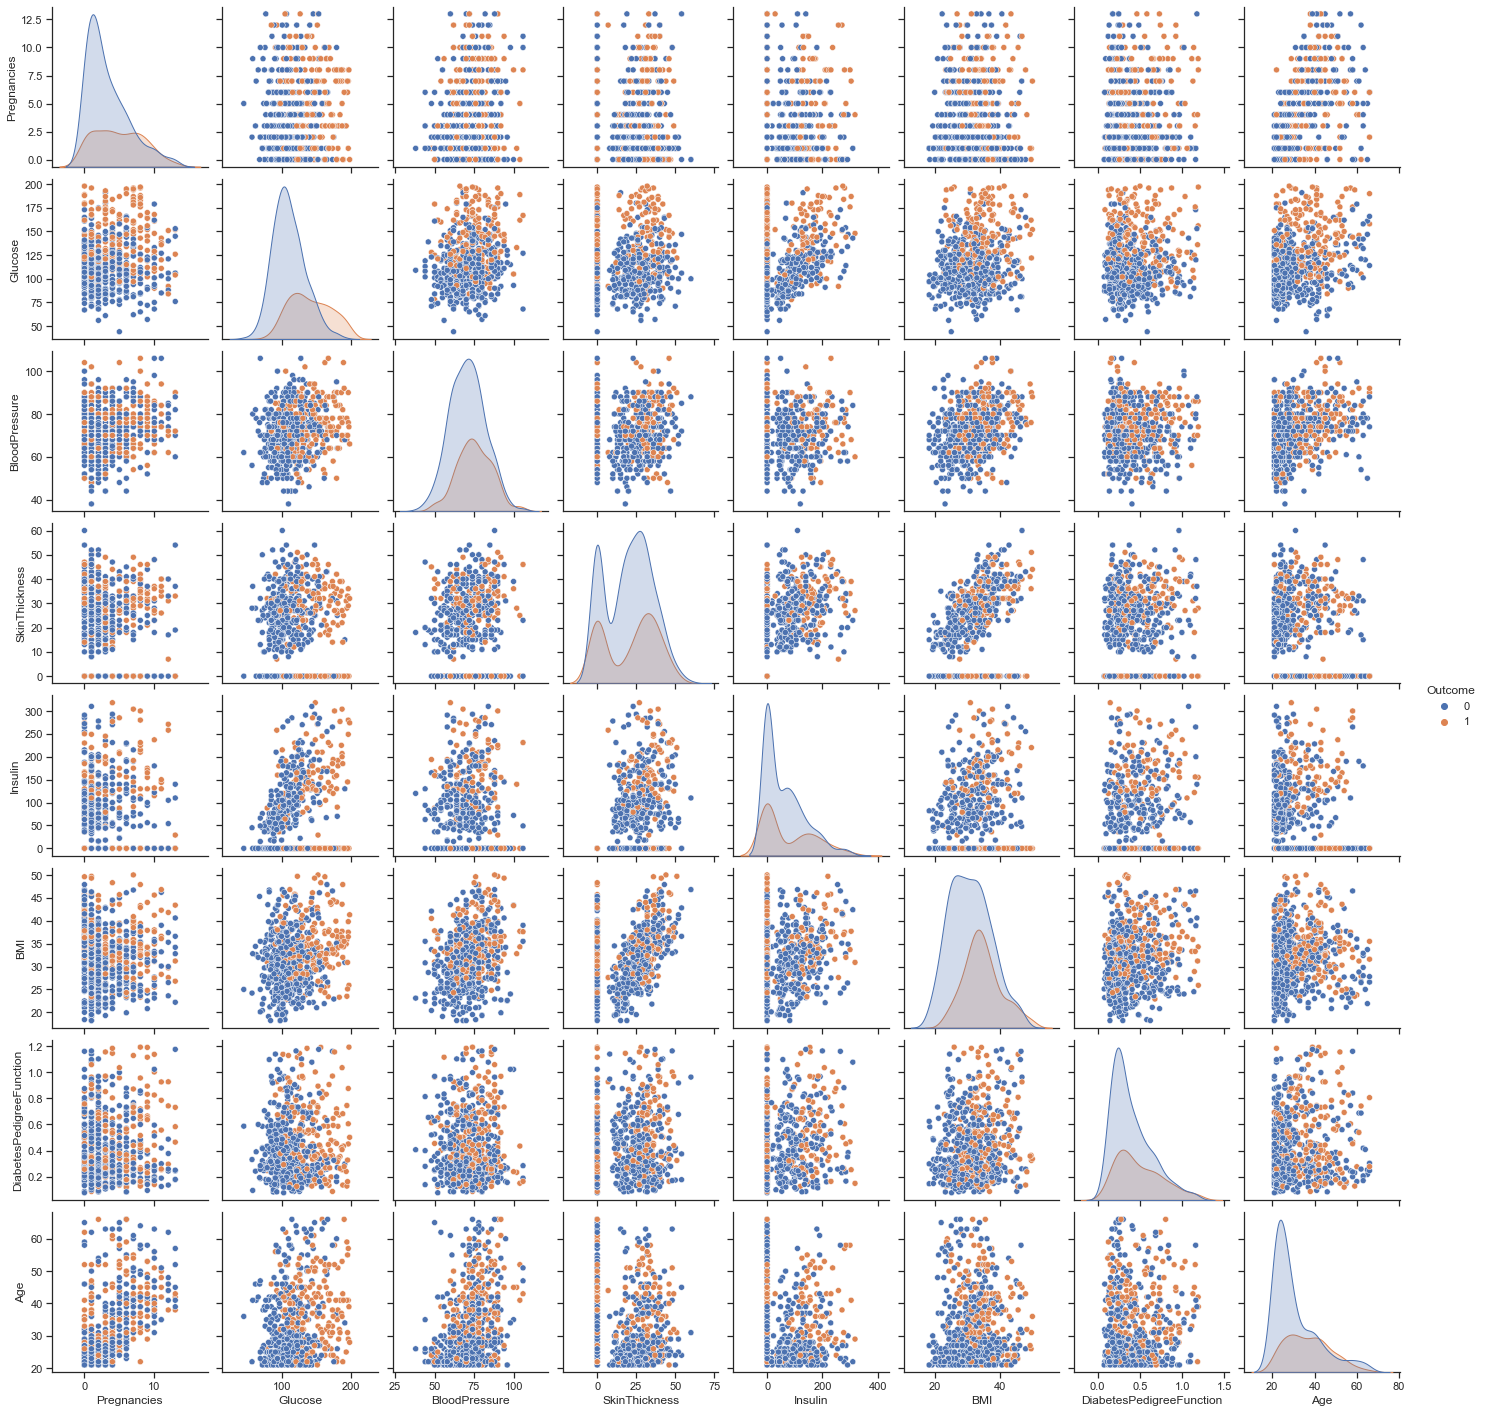

In [14]:
sns.set(style = "ticks")
sns.pairplot(df_out, hue = "Outcome")
plt.show()

#### <font color = black> _Step 6: Feature Extraction_ </font>

In [15]:
X = df_out.drop(columns = ['Outcome'])
y = df_out['Outcome']

#### <font color = black> _Step 7: Split the data into train and test (80:20)_ </font>

In [16]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)


(511, 8)
(128, 8)
(511,)
(128,)


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

#### <font color = black> _Step 8: Build and Train the models_ </font>

#### <font color = purple> _1) Logistic Regression_ </font>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf = LogisticRegression(max_iter = 500)
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7734375 ROC 0.7125
TP:  [10  6  8 11  3  8 12  9  7  8]
TN:  [36 30 30 31 28 33 33 31 30 34]
FN:  [ 6 10  8  5 13  8  4  7  9  8]
FP:  [0 5 5 4 7 2 2 4 5 1]


,Actual,Predicted
686,0,0
211,0,1
236,1,1
295,0,1
547,0,0


#### <font color = purple> _2) Support Vector Machine_ </font>

In [19]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.78125 ROC 0.7181818181818181
TP:  [10  6  8 11  3  8 12  9  7  8]
TN:  [36 32 30 31 28 34 33 31 30 34]
FN:  [ 6 10  8  5 13  8  4  7  9  8]
FP:  [0 3 5 4 7 1 2 4 5 1]


,Actual,Predicted
686,0,0
211,0,1
236,1,1
295,0,1
547,0,0


#### <font color = purple>_3) K- Nearest Neighbor_ </font>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.703125 ROC 0.6681818181818181
TP:  [ 7  5  9 10  8  7 11  8  7 10]
TN:  [32 28 30 26 28 30 27 32 29 28]
FN:  [ 9 11  7  6  8  9  5  8  9  6]
FP:  [4 7 5 9 7 5 8 3 6 7]


,Actual,Predicted
686,0,1
211,0,1
236,1,1
295,0,0
547,0,1


#### <font color = purple> _4) Random Forest_ </font>

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8046875 ROC 0.7488636363636364
TP:  [ 8  5  7 13  4  6 12  9  6 10]
TN:  [36 32 29 30 29 30 32 31 31 33]
FN:  [ 8 11  9  3 12 10  4  7 10  6]
FP:  [0 3 6 5 6 5 3 4 4 2]


,Actual,Predicted
686,0,0
211,0,1
236,1,1
295,0,1
547,0,0


#### <font color = purple> _5) Naive Bayes Classifier_ </font>

In [22]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.765625 ROC 0.740909090909091
TP:  [11  7  8 14  4  9 13  9  8 12]
TN:  [33 31 29 27 27 32 29 30 23 32]
FN:  [ 5  9  8  2 12  7  3  7  8  4]
FP:  [ 3  4  6  8  8  3  6  5 12  3]


,Actual,Predicted
686,0,0
211,0,1
236,1,1
295,0,1
547,0,0


#### <font color = purple> _6) Gradient Boost Classifier_ <font>

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred = clf.predict(test_X)

#find accuracy
ac = accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc = roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result = cross_validate(clf,train_X,train_y,scoring = scoring,cv = 10)
display_result(result)
pd.DataFrame(data = {'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7890625 ROC 0.7238636363636364
TP:  [ 8  6  8 11  4  7 12  8  8  9]
TN:  [35 30 29 29 32 32 31 29 30 33]
FN:  [ 8 10  8  5 12  9  4  8  8  7]
FP:  [1 5 6 6 3 3 4 6 5 2]


,Actual,Predicted
686,0,0
211,0,0
236,1,1
295,0,1
547,0,0


#### <font color = black> _Step 9: Visualizing the accuracy and ROC of the algorithms using a bar graph_ </font> 

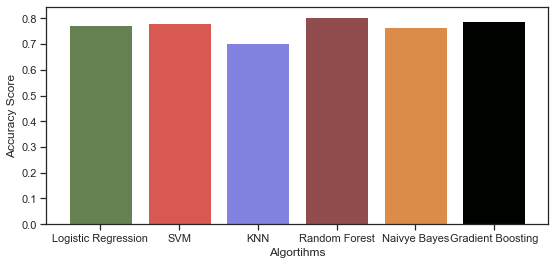

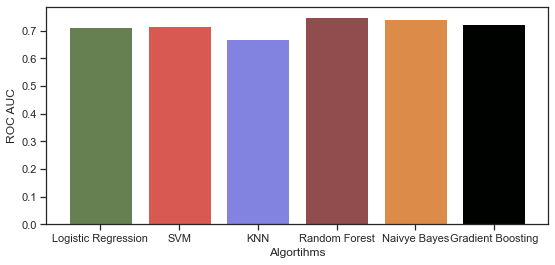

In [24]:
ax = plt.figure(figsize = (9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy', color = ['#678052','#d75952','#8282e1','#914c4d','#dc8b48','#000200'])
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax = plt.figure(figsize = (9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC', color = ['#678052','#d75952','#8282e1','#914c4d','#dc8b48','#000200'])
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

Conclusion: By applying various algorithms we observed the following:
- Random Forest has highest accuracy of 80% and ROC_AUC curve 74%. <br>
- A model can be improved by fine-tuning it.<br>
- In our model around 30% are diabetic and 40% are not diabetic.
